# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [92]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import pandas as pd
import numpy as np
import math
import requests
import time
from scipy.stats import linregress
from scipy import integrate
import IPython as ipy

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
"""
Grading Criteria:
Create Plots to Showcase the Relationship Between Weather Variables and Latitude (30 points)
Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code (10 points)

Create a scatter plot to showcase the relationship between Latitude vs. Temperature (5 points)

Create a scatter plot to showcase the relationship between Latitude vs. Humidity (5 points)

Create a scatter plot to showcase the relationship between Latitude vs. Cloudiness (5 points)

Create a scatter plot to showcase the relationship between Latitude vs. Wind Speed (5 points)

Compute Linear Regression for Each Relationship (40 points)
Linear regression scatter plot for Northern Hemisphere: Temperature (C) vs. Latitude (5 points)

Linear regression scatter plot for Southern Hemisphere: Temperature (C) vs. Latitude (5 points)

Linear regression scatter plot for Northern Hemisphere: Humidity (%) vs. Latitude (5 points)

Linear regression scatter plot for Southern Hemisphere: Humidity (%) vs. Latitude (5 points)

Linear regression scatter plot for Northern Hemisphere: Cloudiness (%) vs. Latitude (5 points)

Linear regression scatter plot for Southern Hemisphere: Cloudiness (%) vs. Latitude (5 points)

Linear regression scatter plot for Northern Hemisphere: Wind Speed (m/s) vs. Latitude (5 points)

Linear regression scatter plot for Southern Hemisphere: Wind Speed (m/s) vs. Latitude (5 points)
"""

'\nGrading Criteria:\nCreate Plots to Showcase the Relationship Between Weather Variables and Latitude (30 points)\nUse the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code (10 points)\n\nCreate a scatter plot to showcase the relationship between Latitude vs. Temperature (5 points)\n\nCreate a scatter plot to showcase the relationship between Latitude vs. Humidity (5 points)\n\nCreate a scatter plot to showcase the relationship between Latitude vs. Cloudiness (5 points)\n\nCreate a scatter plot to showcase the relationship between Latitude vs. Wind Speed (5 points)\n\nCompute Linear Regression for Each Relationship (40 points)\nLinear regression scatter plot for Northern Hemisphere: Temperature (C) vs. Latitude (5 points)\n\nLinear regression scatter plot for Southern Hemisphere: Temperature (C) vs. Latitude (5 points)\n\nLinear regression scatter plot for Northern Hemisphere: Humidity (%) vs. Latitude (5 points)\n\nLinear regression scatte

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

In [5]:
pd.DataFrame(cities).head()

,0
0,blackmans bay
1,dudinka
2,bubaque
3,keflavik
4,avarua


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params = {"q": city, "appid": weather_api_key}
    city_url = requests.get(url, params=params)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = city_url.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | dudinka
Processing Record 3 of Set 1 | bubaque
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | khorramabad
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | curvelo
Processing Record 9 of Set 1 | vorgashor
Processing Record 10 of Set 1 | vernal
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | phongsali
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | iwanai
Processing Record 17 of Set 1 | al bayda'
Processing Record 18 of Set 1 | undurkhaan
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | agadez
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | georgetown
Processing Record 23 o

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,281.22,82,78,2.81,AU,1690114998
1,dudinka,69.4058,86.1778,293.58,61,35,6.14,RU,1690114998
2,bubaque,11.2833,-15.8333,300.14,83,96,6.49,GW,1690114999
3,keflavik,64.0049,-22.5624,286.39,71,75,2.57,IS,1690114999
4,avarua,-21.2078,-159.7750,297.18,100,75,5.66,CK,1690114999


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
# Convert Max Temp to Celsius since we want to maintain the original default of Kelvin since Kelvin is scientifically superior
city_data_df["Max Temp"] -= 273.15

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,8.07,82,78,2.81,AU,1690114998
1,dudinka,69.4058,86.1778,20.43,61,35,6.14,RU,1690114998
2,bubaque,11.2833,-15.8333,26.99,83,96,6.49,GW,1690114999
3,keflavik,64.0049,-22.5624,13.24,71,75,2.57,IS,1690114999
4,avarua,-21.2078,-159.7750,24.03,100,75,5.66,CK,1690114999


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

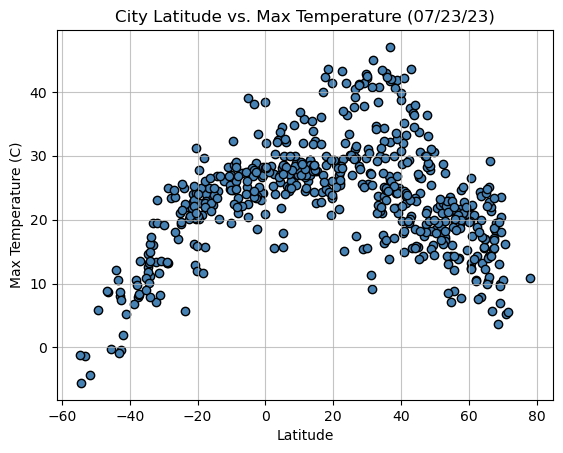

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")



# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.grid(True, alpha=0.75)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

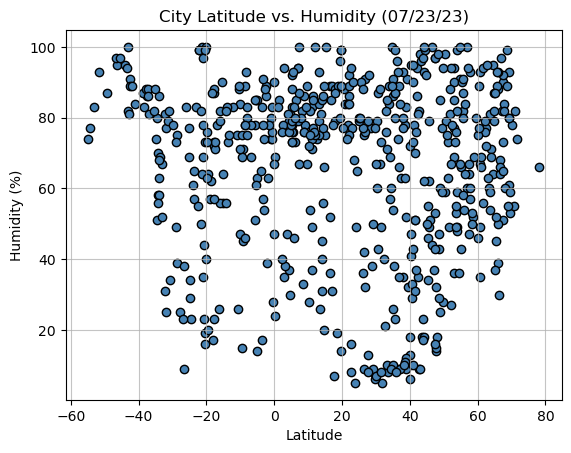

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.grid(True, alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

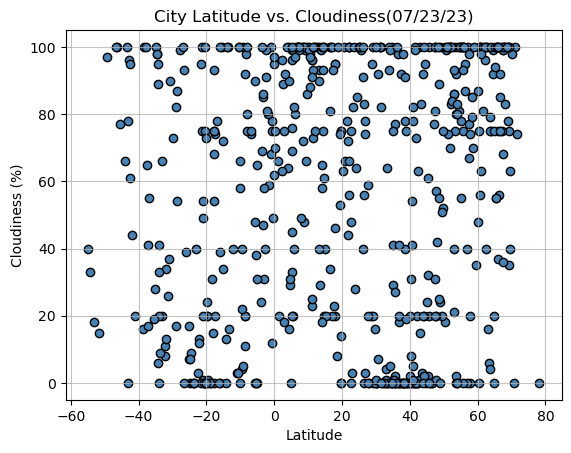

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Cloudiness({time.strftime('%x')})")
plt.grid(True, alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

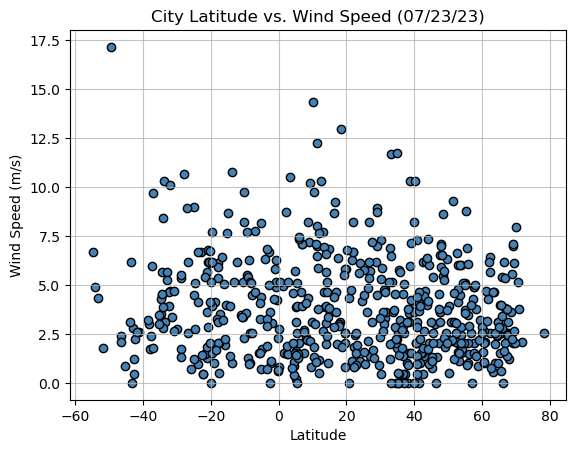

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.grid(True, alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [169]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, chart_title):
        
        # Run regression on hemisphere weather data
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        
        # Calculate the regression line "y values" from the slope and intercept
        regress_values = x_values * slope + intercept
        
        # Get the equation of the line
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

        
        # Assume x_values and y_values are your data
        x_values = np.array(x_values)
        y_values = np.array(y_values)

        # Get min and max
        x_min, x_max = np.min(x_values), np.max(x_values)
        y_min, y_max = np.min(y_values), np.max(y_values)

        # Break into 4 segments each
        x_breaks = np.linspace(x_min, x_max, 5)
        y_breaks = np.linspace(y_min, y_max, 5)

        # Initialize variables to keep track of the farthest quadrant
        farthest_quad = None
        farthest_distance = -np.inf

        # Create a 2D grid of quadrants and iterate over them
        for i in range(4):
                for j in range(4):
                # Determine the boundaries of the current quadrant
                        x_low, x_high = x_breaks[i], x_breaks[i+1]
                        y_low, y_high = y_breaks[j], y_breaks[j+1]
        
                        # Calculate the centroid of the quadrant
                        x_centroid, y_centroid = (x_low + x_high) / 2, (y_low + y_high) / 2
        
                        # Calculate the distances of all points to this centroid
                        distances = np.sqrt((x_values - x_centroid) ** 2 + (y_values - y_centroid) ** 2)
        
                        # Get the minimum distance - this is the distance to the closest point
                        min_distance = np.min(distances)
        
                        # If this distance is larger than the largest we've seen so far, update our "farthest" quadrant
                        if min_distance > farthest_distance:
                                farthest_quad = (x_low, x_high, y_low, y_high)
                                farthest_distance = min_distance
                                text_coordinates = (x_low, y_centroid)




        
        # Create a scatter plot and plot the regression line
        plt.scatter(x_values,y_values, facecolor="steelblue", edgecolor="black", alpha=0.9)
        plt.plot(x_values,regress_values,"r")
        
        # Annotate the text for the line equation
        plt.annotate(line_eq, text_coordinates, fontsize=10,color="red", fontweight="bold",path_effects=[pe.withStroke(linewidth=0.7, foreground='gray')])
        
        # Incorporate the other graph properties
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(chart_title)
        
        # Print r square value
        print(f"The r squared-value is: {r_value**2}")
        if r_value**2 < 0.5:
            print("The r squared-value is less than 0.5. This means that the regression line does not fit the data well.")
            print(f"{x_label} and {y_label} are not correlated.")
        else:
                print("The r squared-value is greater than 0.5. This means that the regression line fits the data well.")
                print(f"{x_label} and {y_label} are correlated.")
        
        print(f"The p-value is: {p_value}")
        if p_value < 0.05:
            print("The p-value is less than 0.05. This means that the regression line is statistically significant.")
        else:
                print("The p-value is greater than 0.05. This means that the regression line is not statistically significant.")

        if p_value < 0.05 and r_value**2 > 0.5:
                print(f"The regression line equation is: {line_eq}")
                print("Due to the p-value and r squared-value agreeing on both significance and correlation, we can say that a linear regression model is appropriate.")
        elif p_value < 0.05 and r_value**2 < 0.5:
                print("Due to the p-value showing significance but a poor r squared value, we can say that a linear regression model is not appropriate and that there are other factors or the relationship is not linear.")
               
        
        # Show plot
        plt.show()
        

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dudinka,69.4058,86.1778,20.43,61,35,6.14,RU,1690114998
2,bubaque,11.2833,-15.8333,26.99,83,96,6.49,GW,1690114999
3,keflavik,64.0049,-22.5624,13.24,71,75,2.57,IS,1690114999
5,khorramabad,33.4878,48.3558,40.79,8,0,5.14,IR,1690114999
8,vorgashor,67.5833,63.9500,17.05,90,99,2.47,RU,1690115000


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,8.07,82,78,2.81,AU,1690114998
4,avarua,-21.2078,-159.7750,24.03,100,75,5.66,CK,1690114999
6,grytviken,-54.2811,-36.5092,-5.56,77,33,4.88,GS,1690114999
7,curvelo,-18.7564,-44.4308,20.75,62,0,4.14,BR,1690115000
12,touros,-5.1989,-35.4608,27.47,63,65,8.15,BR,1690115001


###  Temperature vs. Latitude Linear Regression Plot

The r squared-value is: 0.2780201971808623
The r squared-value is less than 0.5. This means that the regression line does not fit the data well.
Latitude and Max Temp (C) are not correlated.
The p-value is: 8.69851188803536e-31
The p-value is less than 0.05. This means that the regression line is statistically significant.
Due to the p-value showing significance but a poor r squared value, we can say that a linear regression model is not appropriate and that there are other factors or the relationship is not linear.


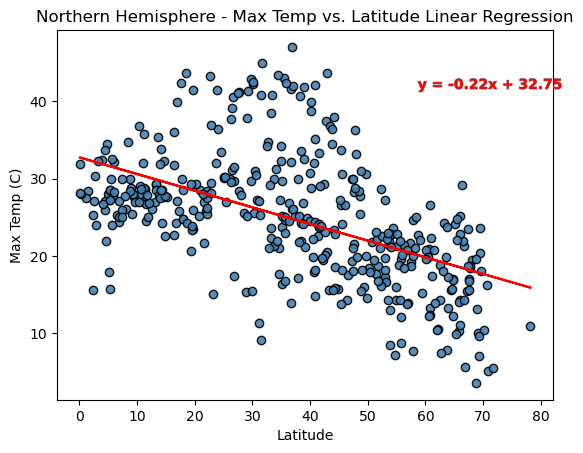

In [170]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp (C)", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

The r squared-value is: 0.7092216037140248
The r squared-value is greater than 0.5. This means that the regression line fits the data well.
Latitude and Max Temp (C) are correlated.
The p-value is: 4.0734796173598236e-46
The p-value is less than 0.05. This means that the regression line is statistically significant.
The regression line equation is: y = 0.51x + 30.35
Due to the p-value and r squared-value agreeing on both significance and correlation, we can say that a linear regression model is appropriate.


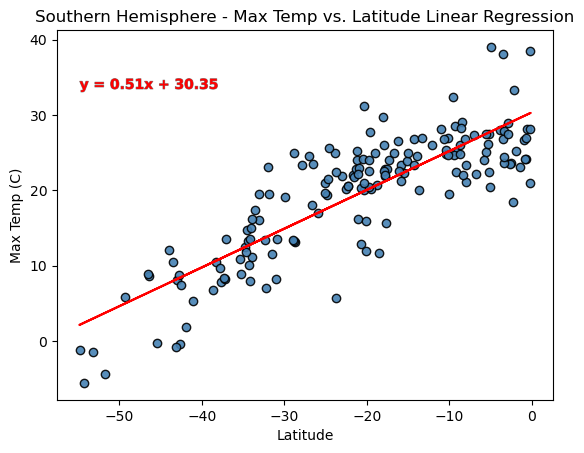

In [162]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp (C)", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r squared-value is: 0.00010655066459655359
The r squared-value is less than 0.5. This means that the regression line does not fit the data well.
Latitude and Humidity (%) are not correlated.
The p-value is: 0.8347336808655792
The p-value is greater than 0.05. This means that the regression line is not statistically significant.


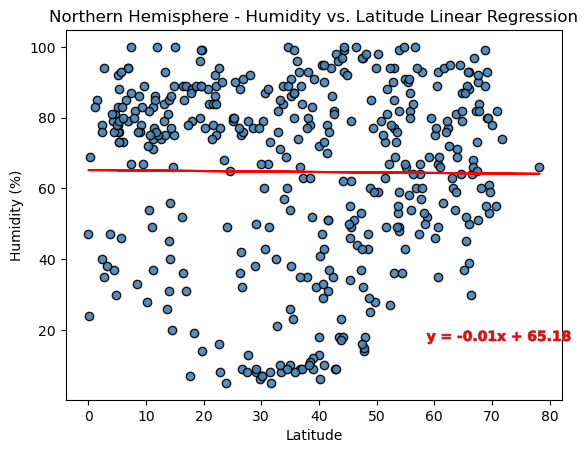

In [163]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression")

The r squared-value is: 0.02275243642034918
The r squared-value is less than 0.5. This means that the regression line does not fit the data well.
Latitude and Humidity (%) are not correlated.
The p-value is: 0.051681442382144636
The p-value is greater than 0.05. This means that the regression line is not statistically significant.


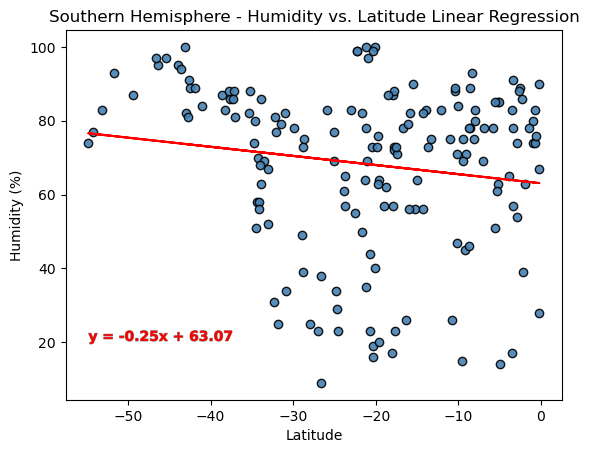

In [164]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r squared-value is: 0.00022381571110716958
The r squared-value is less than 0.5. This means that the regression line does not fit the data well.
Latitude and Cloudiness (%) are not correlated.
The p-value is: 0.7623556471537927
The p-value is greater than 0.05. This means that the regression line is not statistically significant.


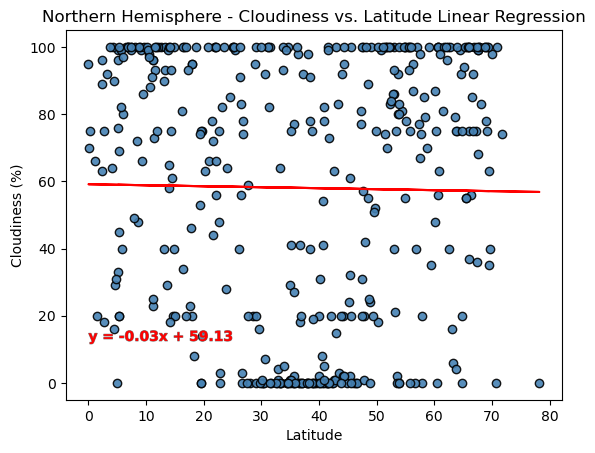

In [165]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

The r squared-value is: 0.0013994665001188964
The r squared-value is less than 0.5. This means that the regression line does not fit the data well.
Latitude and Cloudiness (%) are not correlated.
The p-value is: 0.6312461904214566
The p-value is greater than 0.05. This means that the regression line is not statistically significant.


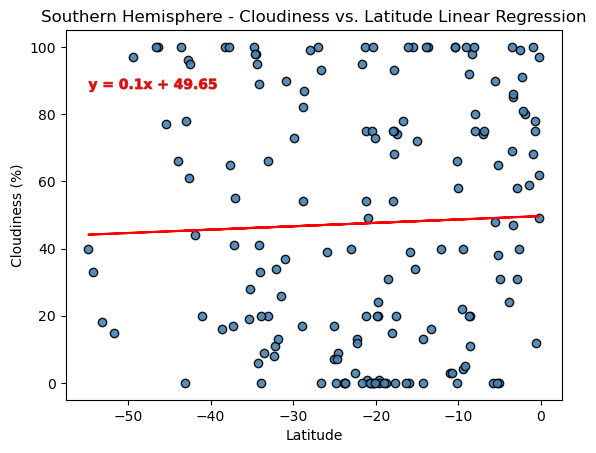

In [166]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r squared-value is: 0.01940103240230506
The r squared-value is less than 0.5. This means that the regression line does not fit the data well.
Latitude and Wind Speed (m/s) are not correlated.
The p-value is: 0.004669391822067393
The p-value is less than 0.05. This means that the regression line is statistically significant.
Due to the p-value showing significance but a poor r squared value, we can say that a linear regression model is not appropriate and that there are other factors or the relationship is not linear.


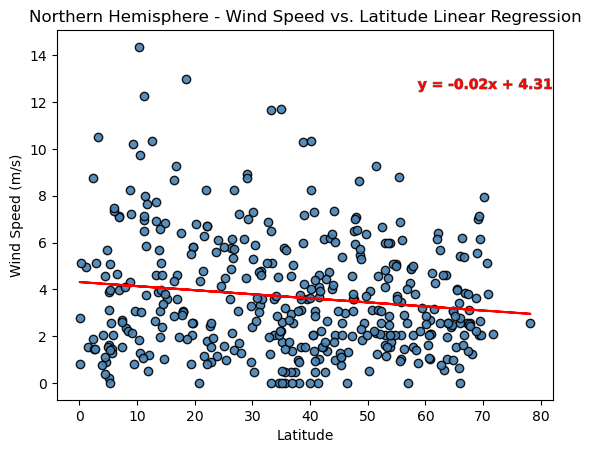

In [167]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

The r squared-value is: 0.0029184754072633565
The r squared-value is less than 0.5. This means that the regression line does not fit the data well.
Latitude and Wind Speed (m/s) are not correlated.
The p-value is: 0.48806301769182847
The p-value is greater than 0.05. This means that the regression line is not statistically significant.


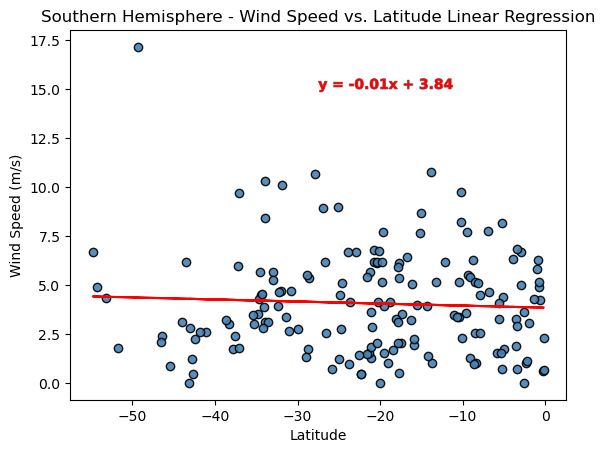

In [168]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

**Discussion about the linear relationship:** YOUR RESPONSE HERE